In [172]:
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict
%matplotlib inline

In [219]:
r_range = [5, 10, 20, 50, 100, 200]
sequential = defaultdict(lambda: defaultdict(list))
for r in r_range:
    name = 'cmake-build-debug/seq_block_r_{}.txt'.format(r)
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                continue
            matrix_size, time = line.split(' ')
            sequential[r]['x'].append(int(matrix_size))
            sequential[r]['y'].append(int(time))
tr_sequential = defaultdict(lambda: defaultdict(list))
for r in r_range:
    if r < 20:
        continue
    name = 'cmake-build-debug/tr_seq_block_r_{}.txt'.format(r)
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                continue
            matrix_size, time = line.split(' ')
            tr_sequential[r]['x'].append(int(matrix_size))
            tr_sequential[r]['y'].append(int(time))
parallel_inner = defaultdict(lambda: defaultdict(list))
for r in r_range:
    name = 'cmake-build-debug/parallel_inner_block_r_{}.txt'.format(r)
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                continue
            matrix_size, time = line.split(' ')
            parallel_inner[r]['x'].append(int(matrix_size))
            parallel_inner[r]['y'].append(int(time))
parallel_outer = defaultdict(lambda: defaultdict(list))
for r in r_range:
    name = 'cmake-build-debug/parallel_outer_block_r_{}.txt'.format(r)
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                continue
            matrix_size, time = line.split(' ')
            parallel_outer[r]['x'].append(int(matrix_size))
            parallel_outer[r]['y'].append(int(time))
tr_parallel_outer = defaultdict(lambda: defaultdict(list))
for r in r_range:
    if r < 20:
        continue
    name = 'cmake-build-debug/tr_parallel_outer_block_r_{}.txt'.format(r)
    with open(name, 'r') as inp:
        for line in inp.read().split('\n'):
            if not line:
                continue
            matrix_size, time = line.split(' ')
            tr_parallel_outer[r]['x'].append(int(matrix_size))
            tr_parallel_outer[r]['y'].append(int(time))

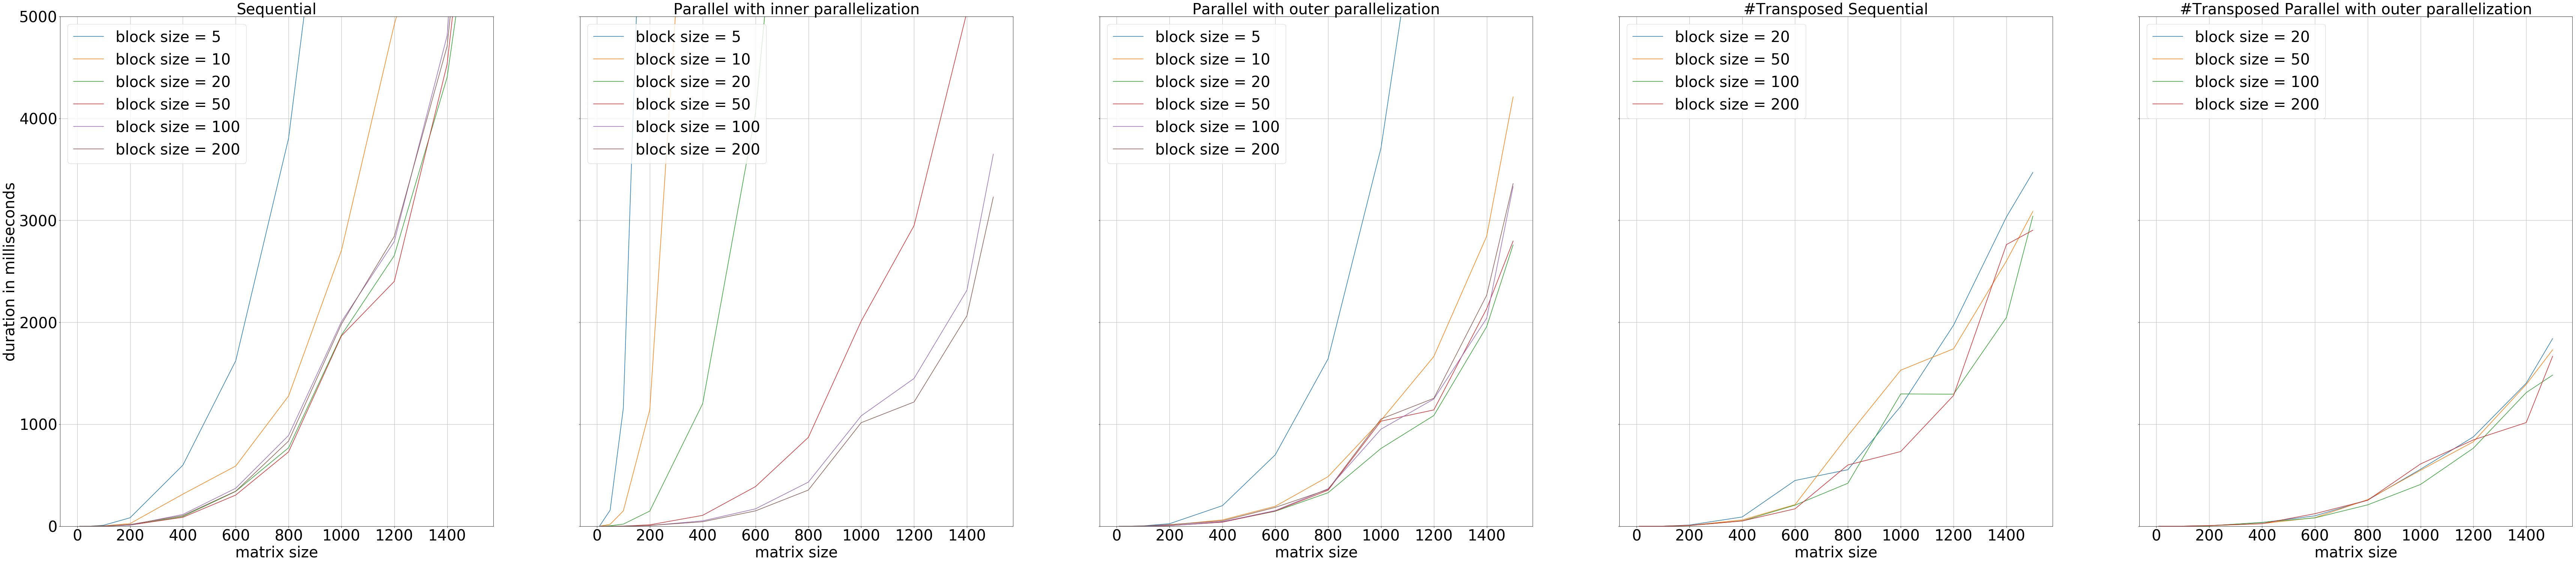

In [226]:
def plot(plot_infos, plot_titles, ylim=None, xlim=None):
    n = len(plot_infos)
    fig, axarr = plt.subplots(1, n, sharey=True)
    axarr[0].set_ylabel('duration in milliseconds', fontsize=40)
    for i in range(n):
        axarr[i].grid()
        for r, axes in plot_infos[i].items():
            axarr[i].plot(axes['x'], axes['y'])
        axarr[i].legend(['block size = {}'.format(r) for r in plot_infos[i]], loc=2, prop={'size':40})
        axarr[i].set_title(plot_titles[i], fontsize=40)
        axarr[i].set_xlabel('matrix size', fontsize=40)
        if ylim:
            axarr[i].set_ylim(ylim)
        if xlim:
            axarr[i].set_xlim(xlim)
        plt.setp(axarr[i].get_xticklabels(), fontsize=40)
        plt.setp(axarr[i].get_yticklabels(), fontsize=40)
    return fig

fig = plot(
    [sequential, parallel_inner, parallel_outer, tr_sequential, tr_parallel_outer],
    ['Sequential', 'Parallel with inner parallelization', 'Parallel with outer parallelization',
    '#Transposed Sequential', '#Transposed Parallel with outer parallelization'],
    ylim=[0, 5000]
)
fig.set_figwidth(120)
fig.set_figheight(25)
fig.savefig('5plots.png')
plt.show()

In [203]:
pointwise_seq = defaultdict(list)
name = 'cmake-build-debug/pointwise_sequential_.txt'
with open(name, 'r') as inp:
    for line in inp.read().split('\n'):
        if not line:
             continue
        matrix_size, time = line.split(' ')
        pointwise_seq['x'].append(int(matrix_size))
        pointwise_seq['y'].append(int(time))
pointwise_par = defaultdict(list)
name = 'cmake-build-debug/pointwise_parallel_.txt'
with open(name, 'r') as inp:
    for line in inp.read().split('\n'):
        if not line:
            continue
        matrix_size, time = line.split(' ')
        pointwise_par['x'].append(int(matrix_size))
        pointwise_par['y'].append(int(time))
tr_pointwise_seq = defaultdict(list)
name = 'cmake-build-debug/tr_pointwise_sequential_.txt'
with open(name, 'r') as inp:
    for line in inp.read().split('\n'):
        if not line:
             continue
        matrix_size, time = line.split(' ')
        tr_pointwise_seq['x'].append(int(matrix_size))
        tr_pointwise_seq['y'].append(int(time))
tr_pointwise_par = defaultdict(list)
name = 'cmake-build-debug/tr_pointwise_parallel_.txt'
with open(name, 'r') as inp:
    for line in inp.read().split('\n'):
        if not line:
            continue
        matrix_size, time = line.split(' ')
        tr_pointwise_par['x'].append(int(matrix_size))
        tr_pointwise_par['y'].append(int(time))

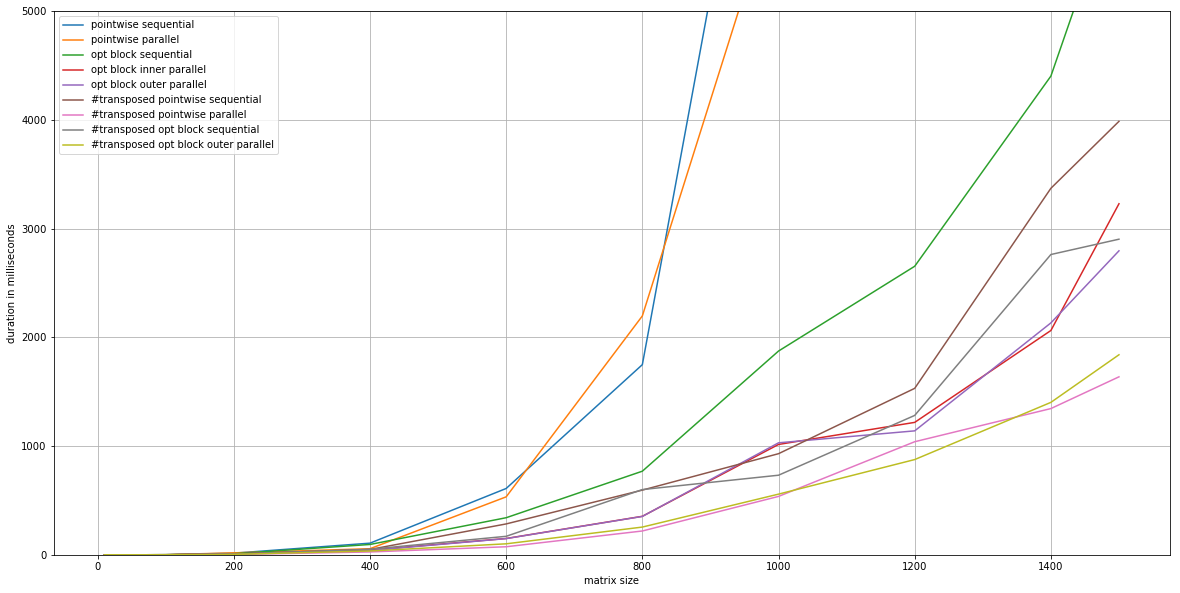

In [227]:
plt.figure(figsize=(20,10))
plt.plot(pointwise_seq['x'], pointwise_seq['y'])
plt.plot(pointwise_par['x'], pointwise_par['y'])
plt.plot(sequential[20]['x'], sequential[20]['y'])
plt.plot(parallel_inner[200]['x'], parallel_inner[200]['y'])
plt.plot(parallel_outer[50]['x'], parallel_outer[50]['y'])
plt.plot(tr_pointwise_seq['x'], tr_pointwise_seq['y'])
plt.plot(tr_pointwise_par['x'], tr_pointwise_par['y'])
plt.plot(tr_sequential[200]['x'], tr_sequential[200]['y'])
plt.plot(tr_parallel_outer[20]['x'], tr_parallel_outer[20]['y'])
plt.grid()
plt.ylabel('duration in milliseconds')
plt.xlabel('matrix size')
plt.legend([
    'pointwise sequential',
    'pointwise parallel',
    'opt block sequential',
    'opt block inner parallel',
    'opt block outer parallel',
    '#transposed pointwise sequential',
    '#transposed pointwise parallel',
    '#transposed opt block sequential',
    '#transposed opt block outer parallel',
])
plt.xlim(None)
plt.ylim([0, 5000])
# plt.savefig('pointwise_plots_with_opt_block_values.png')
plt.show()